In [1]:
!pip3 install matplotlib
!pip3 install seaborn 
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

In [2]:
appl_data = pd.read_csv("dataset/applicationdata.csv")
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
appl_data.ndim

2

In [4]:
print("There are {} rows and {} columns in the data set".format(appl_data.shape[0],appl_data.shape[1]))

There are 307511 rows and 122 columns in the data set


In [5]:
appl_data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [6]:
appl_data.columns[appl_data.dtypes=='float64']

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [7]:
integer_list=appl_data.columns[appl_data.dtypes=='int64']
float_list=appl_data.columns[appl_data.dtypes=='float64']
object_list=appl_data.columns[appl_data.dtypes=='object']

In [8]:
appl_data=appl_data.copy()
print("Original column size",appl_data.shape[1])
new_column_size=appl_data.loc[:,appl_data.isnull().mean()*100>=40]
appl_data.drop(columns=new_column_size,inplace=True)
print("New column size",appl_data.shape[1])

Original column size 122
New column size 73


In [9]:
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
appl_data.loc[:,appl_data.isnull().mean()>0]

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,351000.0,Unaccompanied,Laborers,1.0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,Family,Core staff,2.0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,Unaccompanied,Laborers,1.0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,Unaccompanied,Laborers,2.0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,Unaccompanied,Core staff,1.0,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,27558.0,225000.0,Unaccompanied,Sales staff,1.0,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,12001.5,225000.0,Unaccompanied,NaN,1.0,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,29979.0,585000.0,Unaccompanied,Managers,1.0,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,20205.0,319500.0,Unaccompanied,Laborers,2.0,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
appl_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [12]:
appl_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [13]:
print('99th percentile of AMT_ANNUITY columns is :',np.nanpercentile(appl_data.AMT_ANNUITY,99))
print('99th percentile of AMT_GOODS_PRICE columns is :',np.nanpercentile(appl_data.AMT_GOODS_PRICE,99))

99th percentile of AMT_ANNUITY columns is : 70006.5
99th percentile of AMT_GOODS_PRICE columns is : 1800000.0


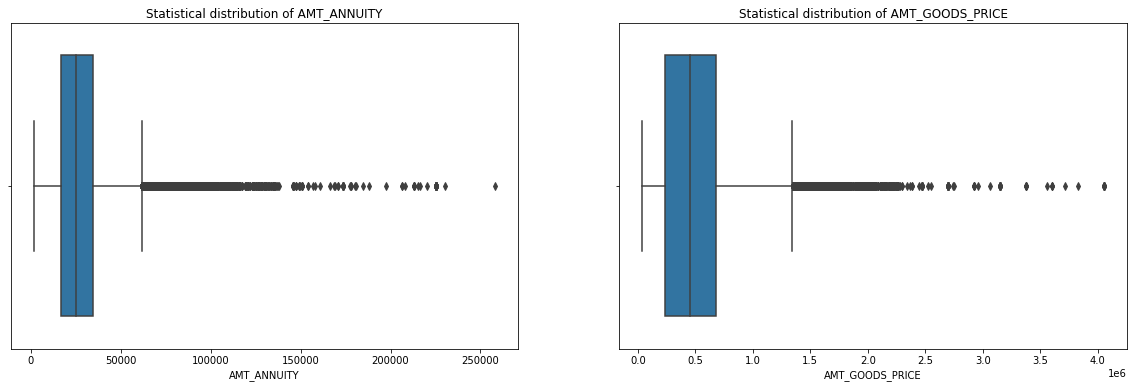

In [14]:
plt.figure(figsize=[20,6])
ax1=plt.subplot(1,2,1)
sns.boxplot(appl_data.AMT_ANNUITY)
plt.title('Statistical distribution of AMT_ANNUITY')
ax2=plt.subplot(1,2,2)
sns.boxplot(appl_data.AMT_GOODS_PRICE)
plt.title('Statistical distribution of AMT_GOODS_PRICE')
plt.show()


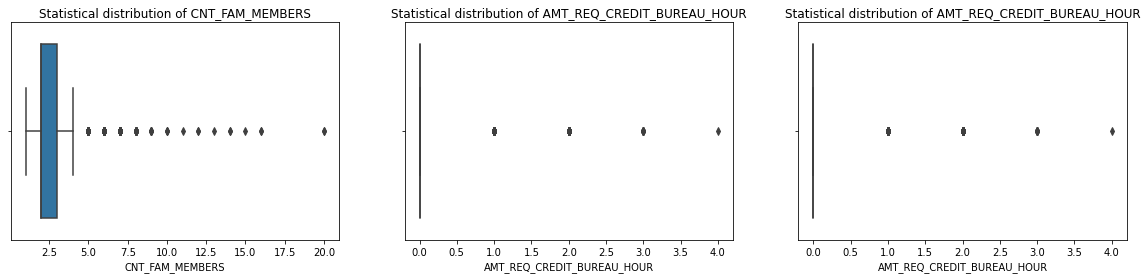

In [15]:
plt.figure(figsize=[20,4])
ax1=plt.subplot(1,3,1)
sns.boxplot(appl_data.CNT_FAM_MEMBERS)
plt.title('Statistical distribution of CNT_FAM_MEMBERS')
ax2=plt.subplot(1,3,2)
sns.boxplot(appl_data.AMT_REQ_CREDIT_BUREAU_HOUR)
plt.title('Statistical distribution of AMT_REQ_CREDIT_BUREAU_HOUR')
ax2=plt.subplot(1,3,3)
sns.boxplot(appl_data.AMT_REQ_CREDIT_BUREAU_HOUR)
plt.title('Statistical distribution of AMT_REQ_CREDIT_BUREAU_HOUR')
plt.show()

In [16]:
appl_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0]

0.0

In [17]:
appl_data['CNT_FAM_MEMBERS'].fillna(appl_data.CNT_FAM_MEMBERS .mode()[0],inplace=True)
appl_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(appl_data.AMT_REQ_CREDIT_BUREAU_HOUR .mode()[0],inplace=True)
appl_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(appl_data.AMT_REQ_CREDIT_BUREAU_DAY .mode()[0],inplace=True)
appl_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(appl_data.AMT_REQ_CREDIT_BUREAU_WEEK .mode()[0],inplace=True)
appl_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(appl_data.AMT_REQ_CREDIT_BUREAU_MON .mode()[0],inplace=True)
appl_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(appl_data.AMT_REQ_CREDIT_BUREAU_QRT .mode()[0],inplace=True)
appl_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(appl_data.AMT_REQ_CREDIT_BUREAU_YEAR .mode()[0],inplace=True)
##Imputing the missing values of AMT_ANNUITY and AMT_GOODS_PRICE based on median

appl_data['AMT_ANNUITY'].fillna(appl_data['AMT_ANNUITY'].median(),inplace=True)
appl_data['AMT_GOODS_PRICE'].fillna(appl_data['AMT_GOODS_PRICE'].median(),inplace=True)
print('Total number of null columns in AMT_ANNUITY',appl_data['AMT_ANNUITY'].isnull().sum())
print('Total number of null columns in AMT_ANNUITY',appl_data['AMT_GOODS_PRICE'].isnull().sum())

Total number of null columns in AMT_ANNUITY 0
Total number of null columns in AMT_ANNUITY 0


In [18]:
print('Mode of NAME_TYPE_SUITE column is',appl_data.NAME_TYPE_SUITE .mode()[0])
print('Mode of OCCUPATION_TYPE column is',appl_data.OCCUPATION_TYPE .mode()[0])

Mode of NAME_TYPE_SUITE column is Unaccompanied
Mode of OCCUPATION_TYPE column is Laborers


In [19]:
appl_data['NAME_TYPE_SUITE'].fillna(appl_data.NAME_TYPE_SUITE .mode()[0],inplace=True)
appl_data['OCCUPATION_TYPE'].fillna(appl_data.OCCUPATION_TYPE .mode()[0],inplace=True)
appl_data.loc[:,appl_data.isnull().mean()>0].shape[1]

7

In [22]:
days_list=[]
for i in float_list:
    if('days' in i.lower())==True:
        days_list.append(i)
for j in integer_list:
     if('days' in j.lower())==True:
        days_list.append(j)
print(days_list)

['DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']


In [23]:
appl_data.loc[:,days_list].head()

,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH
0,-3648.0,-1134.0,-9461,-637,-2120
1,-1186.0,-828.0,-16765,-1188,-291
2,-4260.0,-815.0,-19046,-225,-2531
3,-9833.0,-617.0,-19005,-3039,-2437
4,-4311.0,-1106.0,-19932,-3038,-3458


In [24]:
appl_data['DAYS_REGISTRATION']=appl_data['DAYS_REGISTRATION'].abs()
appl_data['DAYS_LAST_PHONE_CHANGE']=appl_data['DAYS_LAST_PHONE_CHANGE'].abs()
appl_data['DAYS_BIRTH']=appl_data['DAYS_BIRTH'].abs()
appl_data['DAYS_EMPLOYED']=appl_data['DAYS_EMPLOYED'].abs()
appl_data['DAYS_ID_PUBLISH']=appl_data['DAYS_ID_PUBLISH'].abs()
appl_data.loc[:,days_list].head()

,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH
0,3648.0,1134.0,9461,637,2120
1,1186.0,828.0,16765,1188,291
2,4260.0,815.0,19046,225,2531
3,9833.0,617.0,19005,3039,2437
4,4311.0,1106.0,19932,3038,3458


In [25]:
print('Maximum income of clients is ',appl_data.AMT_INCOME_TOTAL.describe()[-1])
print('Median income of clients is',appl_data.AMT_INCOME_TOTAL.describe()[5])
print('Minimum income of clients is ',appl_data.AMT_INCOME_TOTAL.describe()[3])

Maximum income of clients is  117000000.0
Median income of clients is 147150.0
Minimum income of clients is  25650.0


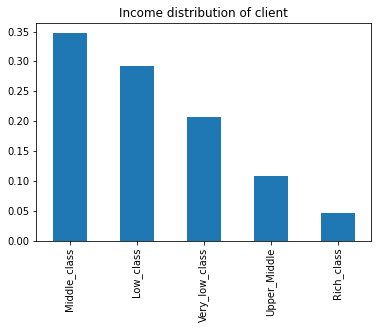

In [26]:
appl_data['AMT_INCOME_TOTAL_BINS']= pd.qcut(appl_data.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1],
                                                                labels=['Very_low_class', 'Low_class', 'Middle_class','Upper_Middle','Rich_class'])
appl_data['AMT_INCOME_TOTAL_BINS'].value_counts(normalize=True).plot.bar()
plt.title('Income distribution of client')
plt.show()

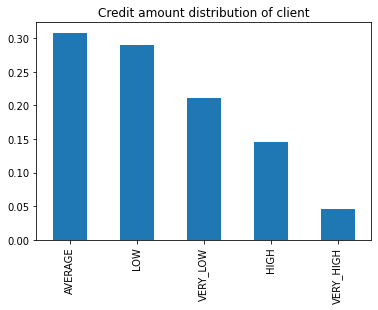

In [27]:
appl_data['AMT_CREDIT_BINS']= pd.qcut(appl_data.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1],
                                                                labels=['VERY_LOW', 'LOW', "AVERAGE", 'HIGH', 'VERY_HIGH'])
appl_data['AMT_CREDIT_BINS'].value_counts(normalize=True).plot.bar()
plt.title('Credit amount distribution of client')
plt.show()

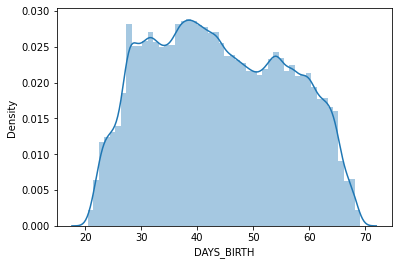

In [28]:
appl_data.DAYS_BIRTH=round(appl_data.DAYS_BIRTH/365.25,2)
sns.distplot(appl_data.DAYS_BIRTH,kde=True)
plt.show()

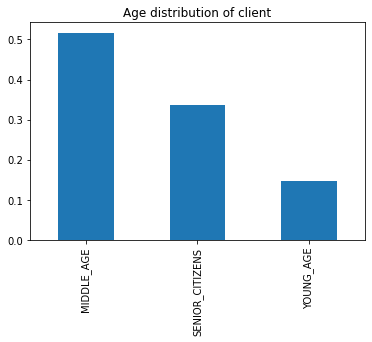

In [29]:
appl_data['DAYS_BIRTH_bins']=pd.cut(appl_data.DAYS_BIRTH,[0,30,50,120]
                                    ,labels=['YOUNG_AGE','MIDDLE_AGE','SENIOR_CITIZENS'])
appl_data['DAYS_BIRTH_bins'].value_counts(normalize=True).plot.bar()
plt.title('Age distribution of client')
plt.show()

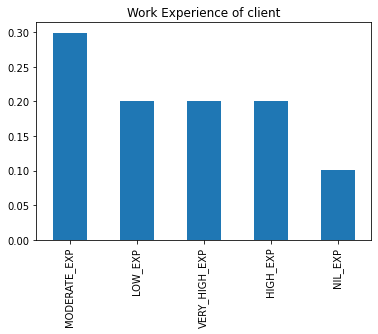

In [30]:
appl_data.DAYS_EMPLOYED=round(appl_data.DAYS_EMPLOYED/365.25,2)
appl_data['DAYS_EMPLOYED_BINS']= pd.qcut(appl_data.DAYS_EMPLOYED, q=[0,0.1,0.3,0.6,0.8,1],
                                                                labels=['NIL_EXP', 'LOW_EXP', 'MODERATE_EXP', 'HIGH_EXP','VERY_HIGH_EXP'])
appl_data['DAYS_EMPLOYED_BINS'].value_counts(normalize=True).plot.bar()
plt.title('Work Experience of client')
plt.show()

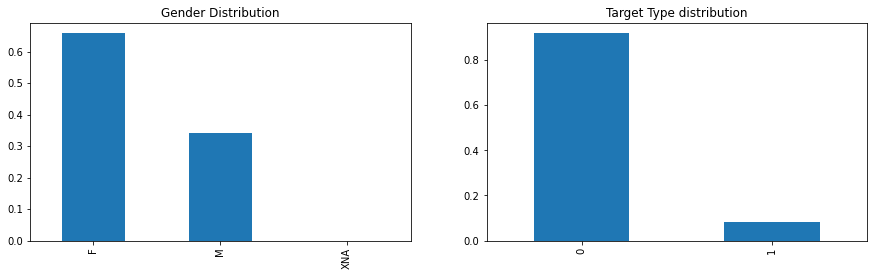

In [31]:
plt.figure(figsize=[15,4])
ax1=plt.subplot(1,2,1)
appl_data["CODE_GENDER"].value_counts(normalize=True).plot.bar()
plt.title('Gender Distribution')
ax2=plt.subplot(1,2,2)
appl_data.TARGET.value_counts(normalize=True).plot.bar()
plt.title('Target Type distribution')
plt.show()